In [ ]:
import os
import numpy as np
import pandas as pd
import tqdm as tqdm
import cv2 as cv
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D ,GlobalAveragePooling2D ,Flatten , Dense , Dropout , BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
tf.keras.applications.VGG16
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model

In [ ]:
encoder = OneHotEncoder()     #LabelEncoder encode labels with value between 0 and n_classes-1
encoder.fit([[0],[1]])

OneHotEncoder()

In [ ]:
input_path = []
label = []

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = []
paths = []
result = []
for r,d,f in os.walk(r"/content/drive/MyDrive/BrainTumor2/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(1)
        input_path.append(os.path.join("Tumor","Tumor",path))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:

paths = []
for r,d,f in os.walk(r"/content/drive/MyDrive/BrainTumor2/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r,file))
for path in paths:
    img = Image.open(path)
    img = img.resize((224,224))
    img = np.array(img)
    if(img.shape == (224,224,3)):
        data.append(img)
        label.append(0)
        input_path.append(os.path.join("No Tumor","No Tumor",path))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(1311, 224, 224, 3)

In [ ]:
result = np.array(result)
result=result.reshape(1311,2)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
modelVGG = VGG16(include_top = False,weights = 'imagenet',classifier_activation = 'softmax',input_shape = (224, 224, 3))

In [ ]:
for layer in modelVGG.layers:
    layer.trainable = False

In [ ]:
num_classes = 2
for (i,layer) in enumerate(modelVGG.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
    def lw(bottom_model,num_classes):
        top_model = bottom_model.output
        top_model = GlobalAveragePooling2D()(top_model)
        top_model = Dense(1024,activation='relu')(top_model)
#         top_model = Dense(1024,activation='relu')(top_model)
        #top_model = Dense(512,activation='relu')(top_model)
        top_model = Dense(2,activation='softmax')(top_model)
        return top_model

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model
num_classes = 2
FC_Head = lw(modelVGG , num_classes)
model = Model(inputs = modelVGG.input,outputs = FC_Head)

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test),verbose=1)

Epoch 1/5
33/33 [==============================] - 804s 24s/step - loss: 1.6853 - accuracy: 0.8387 - val_loss: 0.3046 - val_accuracy: 0.9316
Epoch 2/5
33/33 [==============================] - 720s 22s/step - loss: 0.1729 - accuracy: 0.9618 - val_loss: 0.1130 - val_accuracy: 0.9544
Epoch 3/5
33/33 [==============================] - 777s 24s/step - loss: 0.1042 - accuracy: 0.9714 - val_loss: 0.0647 - val_accuracy: 0.9810
Epoch 4/5
33/33 [==============================] - 777s 24s/step - loss: 0.0264 - accuracy: 0.9924 - val_loss: 0.0446 - val_accuracy: 0.9848
Epoch 5/5
33/33 [==============================] - 779s 24s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 0.9772


In [ ]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

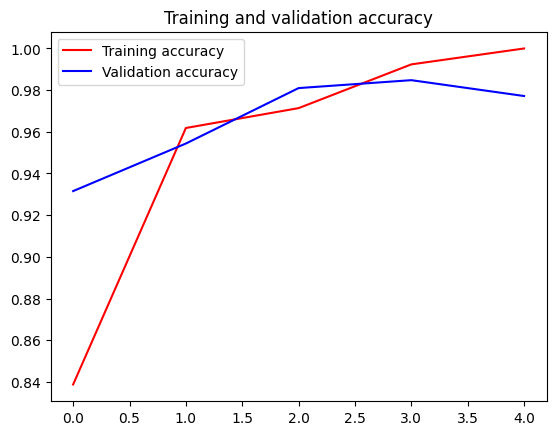

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
def names(number):
    if number==0:
        return  "It's a TUMOR"
    else:
        return  "It's NOT a Tumor"

99.81076717376709%It's a TUMOR


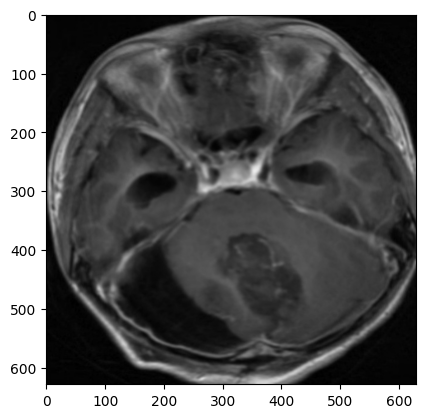

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/BrainTumor2/yes/Te-glTr_0000.jpg")
x = np.array(img.resize((224,224)))
x = x.reshape(1,224,224,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)  +  "%" +    names(classification))

99.9858021736145%It's NOT a Tumor


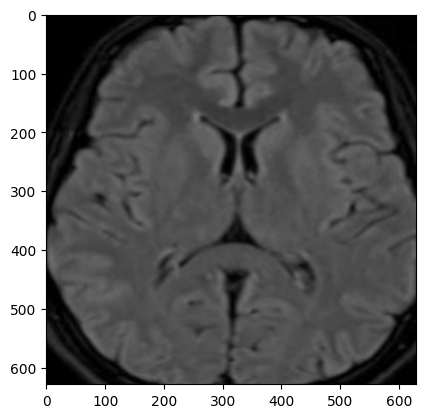

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/BrainTumor2/no/Te-noTr_0002.jpg")
x = np.array(img.resize((224,224)))
x = x.reshape(1,224,224,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+"%" + names(classification))